In [53]:
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
def data_import(filename):

    # 打开log文件
    with open(filename, 'r') as file:
        lines = file.readlines()

    data = []
    start_data = False
    current_name = None
    current_params = None

    # 遍历文件的每一行
    for line in lines:
        if "→" in line:
            start_data = True
            parts = line.strip().split('\t')
            current_name = parts[1]
            current_params = parts[2:6]
            # current_name = line.split("\t")[1].split(" ")[0]
            # current_params = line.split("\t")[1].split(" ")[1:]
            continue
        if start_data:
            metric_parts = line.strip().split("\t")
            metric_value = float(metric_parts[1])
            data.append([current_name] + current_params + [metric_value])
            start_data = False

    # 将data转化为DataFrame
    df = pd.DataFrame(data, columns=["Name", "ThreadsNumber", "UpdateRatio", "ListSize", "Range", "Throughput"])

    return df

In [55]:
CG_data = data_import("CoarseGrainedListBasedSet.log")
HOH_data = data_import("HandOverHandListIntSet.log")
LL_data = data_import("LazyLinkedListSortedSet.log")

Three plots (one per algorithm), with three curves each, for a ﬁxed update ratio 10% and varying list size.

In [56]:
def plot_fix_updateratio_vary_listsize(data):
    plt.figure(figsize=(8, 6))
    number_of_listsizes = list(data.ListSize.unique())
    for number_of_listsize in number_of_listsizes:
        x = list(data.ThreadsNumber.unique())
        y = data[(data.UpdateRatio=="10") & (data.ListSize==number_of_listsize)].Throughput
        plt.plot(x,y,label=("List Size: "+number_of_listsize),marker='o')
    plt.grid()
    plt.xlabel("Number of Threads")
    plt.ylabel("Throughput(ops/s)")
    title = data.Name[0] + ", Update Ratio = 10%"
    plt.title(title)
    plt.legend()
    plt.savefig(('./pic/fix_update_ratio/'+title+'.png'))
    plt.show()

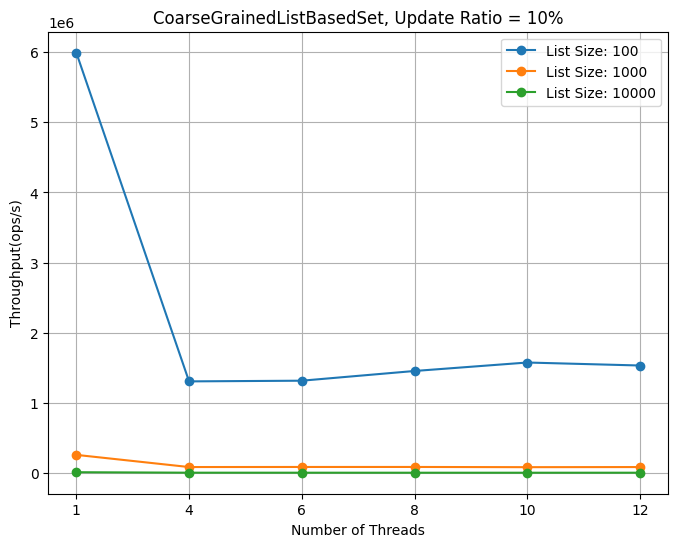

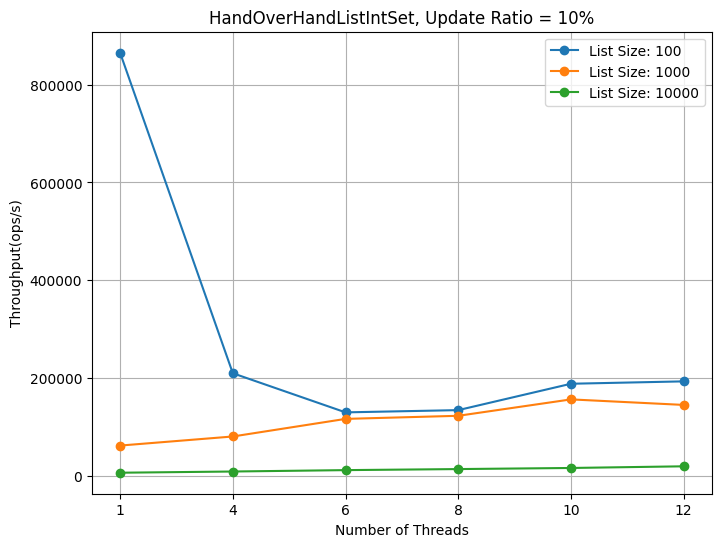

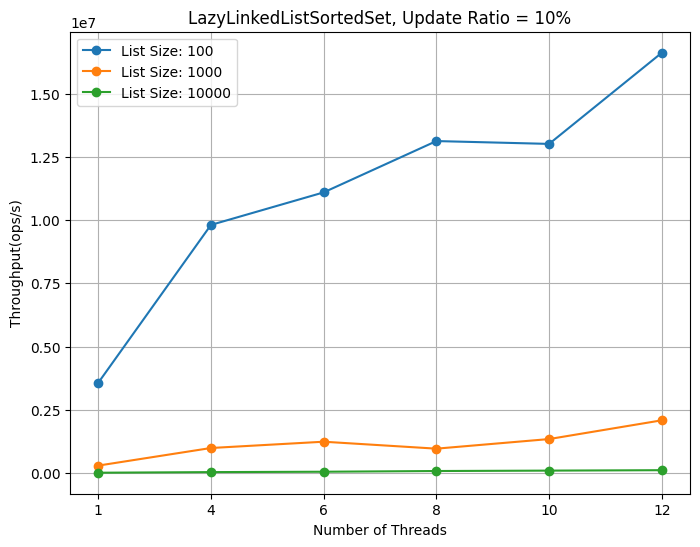

In [57]:
plot_fix_updateratio_vary_listsize(CG_data)
plot_fix_updateratio_vary_listsize(HOH_data)
plot_fix_updateratio_vary_listsize(LL_data)

Three plots (one per algorithm), with three curves each, for a ﬁxed list size 100 and varying update ratios.

In [58]:
def plot_fix_listsize_vary_updateratio(data):
    plt.figure(figsize=(8, 6))
    number_of_updateratios = list(data.UpdateRatio.unique())
    for number_of_updateratio in number_of_updateratios:
        x = list(data.ThreadsNumber.unique())
        y = data[(data.ListSize=="100") & (data.UpdateRatio==number_of_updateratio)].Throughput
        plt.plot(x,y,label=("Update Ratio: "+number_of_updateratio),marker='o')
    plt.grid()
    plt.xlabel("Number of Threads")
    plt.ylabel("Throughput(ops/s)")
    title = data.Name[0] + ", List Size = 100"
    plt.title(title)
    plt.legend()
    plt.savefig(('./pic/fix_listsize/'+title+'.png'))
    plt.show()

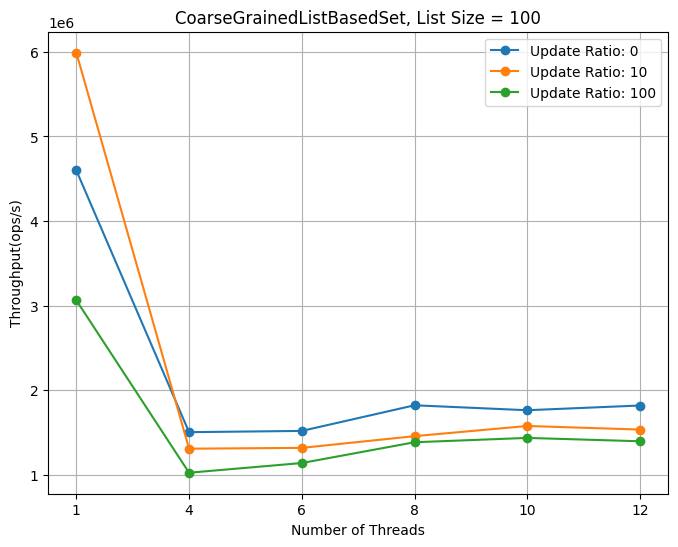

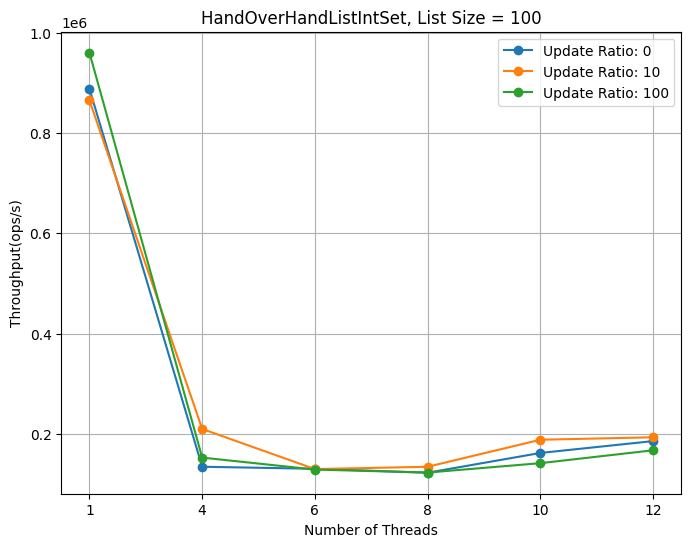

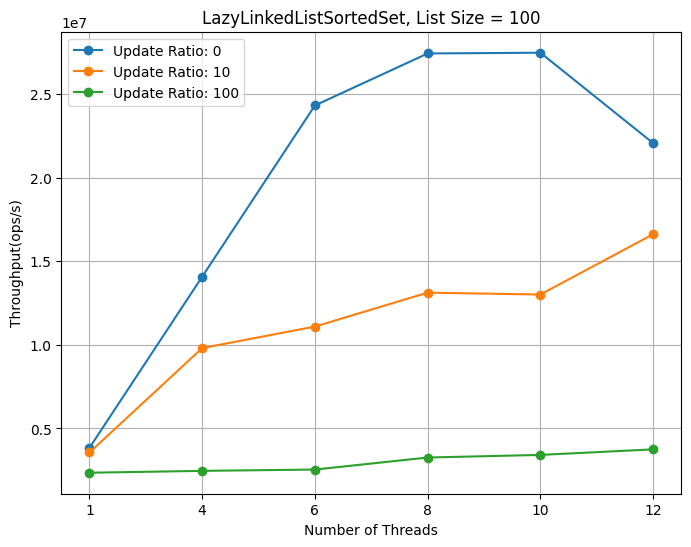

In [59]:
plot_fix_listsize_vary_updateratio(CG_data)
plot_fix_listsize_vary_updateratio(HOH_data)
plot_fix_listsize_vary_updateratio(LL_data)

One plot, with three curves (one per algorithm), with ﬁxed update ratio 10% and list size 1000.

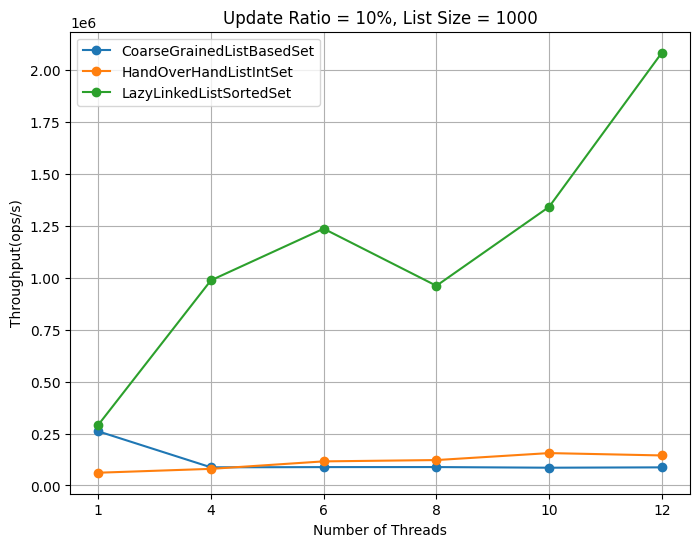

In [60]:
plt.figure(figsize=(8, 6))

data_sets = [CG_data, HOH_data, LL_data]
for data in data_sets:
    x = list(data.ThreadsNumber.unique())
    y = data[(data.ListSize=="1000") & (data.UpdateRatio=="10")].Throughput
    plt.plot(x,y,label=(data.Name[0]),marker='o')
plt.grid()
plt.xlabel("Number of Threads")
plt.ylabel("Throughput(ops/s)")
title =  "Update Ratio = 10%, List Size = 1000"
plt.title(title)
plt.legend()
plt.savefig(('./pic/'+title+'.png'))
plt.show()